# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [223]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
print(merged_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [224]:
# Checking the number of mice
num_mice = merged_data["Mouse ID"].nunique()

# Display the result
print(f'The number of mice is: {num_mice}')

The number of mice is: 249


In [225]:
# Identify duplicate mice by Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Get all the data for the duplicate mouse ID
duplicate_mouse_id = duplicate_mice['Mouse ID'].iloc[0]  # Assuming there is only one duplicate mouse ID

# Filter the entire DataFrame for the duplicate mouse ID
all_data_duplicate_mouse = merged_data[merged_data['Mouse ID'] == duplicate_mouse_id]

# Display all the data for the duplicate mouse ID
print("All Data for Duplicate Mouse ID:")
print(all_data_duplicate_mouse)

All Data for Duplicate Mouse ID:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Fema

In [226]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Display the clean DataFrame
print("Cleaned Data:")
print(cleaned_data)

Cleaned Data:
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0 

In [227]:
# Checking the number of mice in the clean DataFrame
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()

# Display the result
print(f'The number of mice in the cleaned DataFrame is: {num_mice_cleaned}')

The number of mice in the cleaned DataFrame is: 249


In [228]:
# Group the data by Drug Regimen
regimen_grouped = cleaned_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = regimen_grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better clarity
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']

# Display the summary statistics DataFrame
print("Summary Statistics for Tumor Volume by Drug Regimen:")
print(summary_statistics)

Summary Statistics for Tumor Volume by Drug Regimen:
                   Mean     Median   Variance  Std Deviation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.393463  50.909965  43.138803       6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398


## Summary Statistics

In [229]:
# Using the aggregation method to generate summary statistics
grouped_data = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

summary_statistics_advanced = grouped_data.agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Deviation='std',
    SEM='sem'
)

# Display the summary statistics DataFrame
print("Summary Statistics for Tumor Volume by Drug Regimen (Advanced):")
print(summary_statistics_advanced)

Summary Statistics for Tumor Volume by Drug Regimen (Advanced):
                   Mean     Median   Variance  Std_Deviation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.393463  50.909965  43.138803       6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398


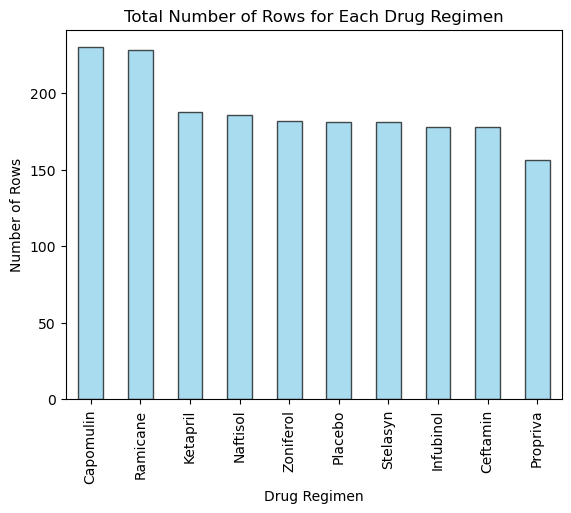

In [230]:
# Count the number of rows for each drug regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot using Pandas
regimen_counts.plot(kind='bar', color='skyblue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()

## Bar and Pie Charts

In [231]:
# Using the aggregation method to generate summary statistics in a single line
summary_statistics_advanced = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Deviation='std',
    SEM='sem'
)

# Display the summary statistics DataFrame
print("Summary Statistics for Tumor Volume by Drug Regimen (Advanced):")
print(summary_statistics_advanced)

Summary Statistics for Tumor Volume by Drug Regimen (Advanced):
                   Mean     Median   Variance  Std_Deviation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.393463  50.909965  43.138803       6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398


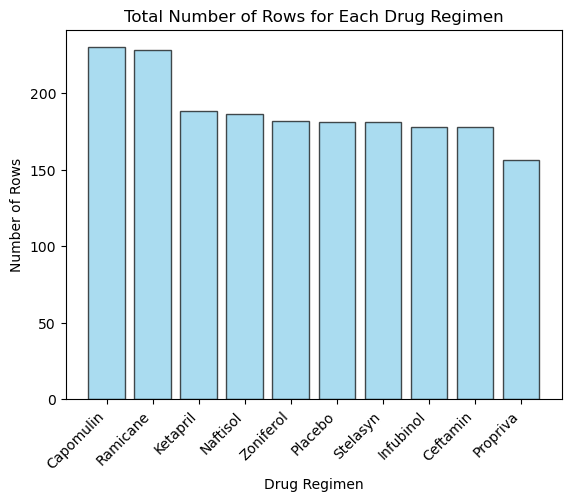

In [232]:
import matplotlib.pyplot as plt

# Count the number of rows for each drug regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot using pyplot
plt.bar(regimen_counts.index, regimen_counts, color='skyblue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

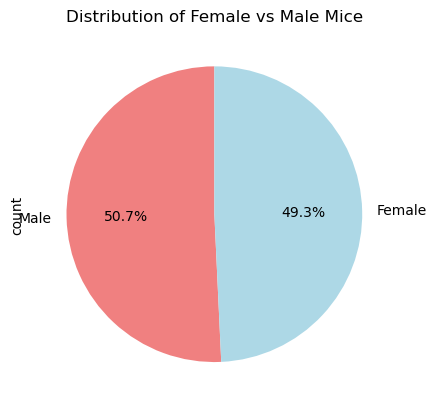

In [233]:
# Count the number of male and female mice
gender_distribution = cleaned_data['Sex'].value_counts()

# Generate a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=90)

# Add title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

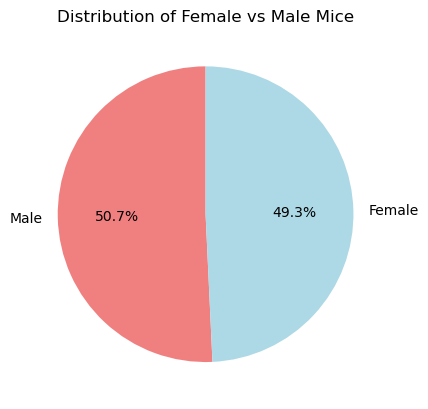

In [234]:
import matplotlib.pyplot as plt

# Count the number of male and female mice
gender_distribution = cleaned_data['Sex'].value_counts()

# Generate a pie plot using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=90)

# Add title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [235]:
# Identify the treatment regimens of interest
treatments_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data to include only the specified treatments
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatments_of_interest)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Create a DataFrame with the last timepoints
last_timepoints_df = pd.DataFrame(last_timepoints)

# Merge this DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_data_final_tumor = pd.merge(last_timepoints_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the DataFrame with the final tumor volume for each mouse
print("Final Tumor Volume for Each Mouse:")
print(merged_data_final_tumor[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])

Final Tumor Volume for Each Mouse:
   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [236]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data_final_tumor.loc[merged_data_final_tumor['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(tumor_volume)
    
    # Calculate the IQR for each treatment regimen
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Print potential outliers for each treatment regimen
    potential_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"Potential outliers for {treatment}: {potential_outliers.tolist()}")

# Display the tumor volume data list
print("Tumor Volume Data for Plotting:")
print(tumor_volume_data)

Potential outliers for Capomulin: []
Potential outliers for Ramicane: []
Potential outliers for Infubinol: [36.3213458]
Potential outliers for Ceftamin: []
Tumor Volume Data for Plotting:
[9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64, 3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    31.560470
38    36.134852
40    22.050126
50    30.564625
54    31.095335
62    45.220869
63    36.561652
66    37.225650
67    43.419381
71    30.276232
77    40.667713
87    43.166373
9

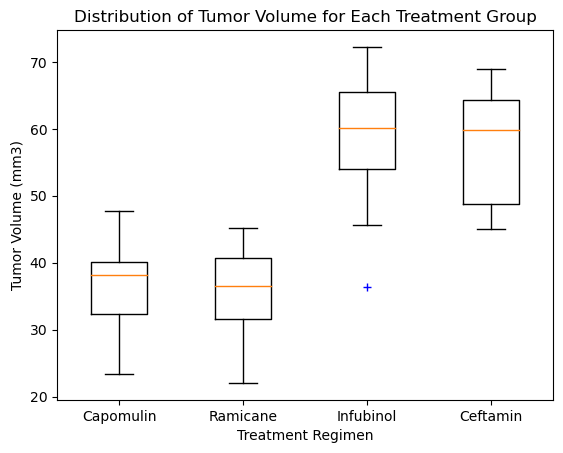

In [237]:
import matplotlib.pyplot as plt

# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data_final_tumor.loc[merged_data_final_tumor['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(tumor_volume)

# Create a box plot
plt.boxplot(tumor_volume_data, labels=treatments, sym='b+')  # 'sym' adds individual data points to the plot

# Add labels and title
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

## Line and Scatter Plots

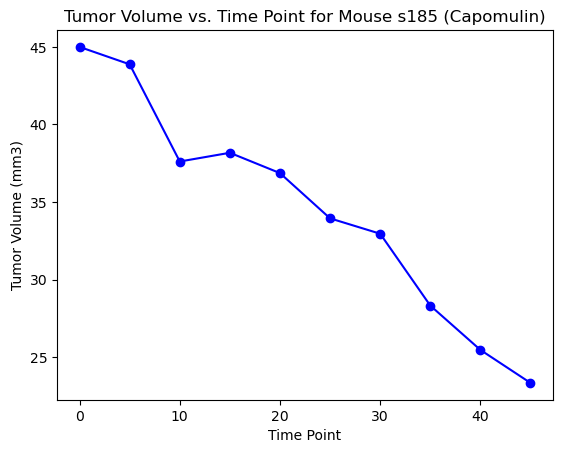

In [238]:
import matplotlib.pyplot as plt

# Choose a mouse ID treated with Capomulin (replace 'your_mouse_id' with an actual Mouse ID)
selected_mouse_id = 's185'  # Replace with an actual Mouse ID in your dataset
capomulin_data_single_mouse = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == selected_mouse_id)]

# Plot the line chart
plt.plot(capomulin_data_single_mouse['Timepoint'], capomulin_data_single_mouse['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue')

# Add labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

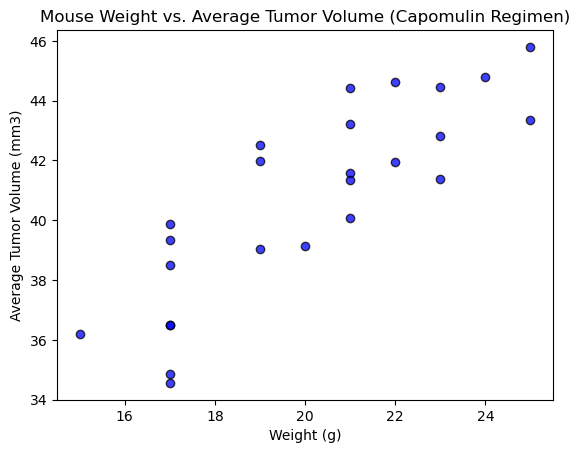

In [239]:
import matplotlib.pyplot as plt

# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse metadata to include weight information
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

# Create a scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black', alpha=0.75)

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694721


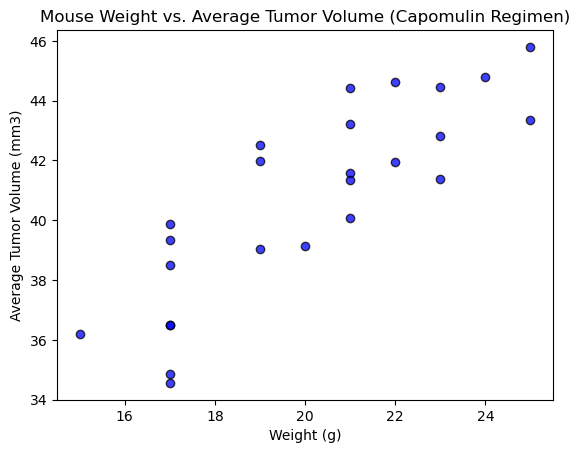

In [240]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Filter data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume data with mouse metadata to include weight information
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient, _ = pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create a scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='blue', edgecolor='black', alpha=0.75)

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")

# Display the plot
plt.show()